## Abstract Sapientino

Level of abstraction "zero".

The agent can move from any location to any other location.

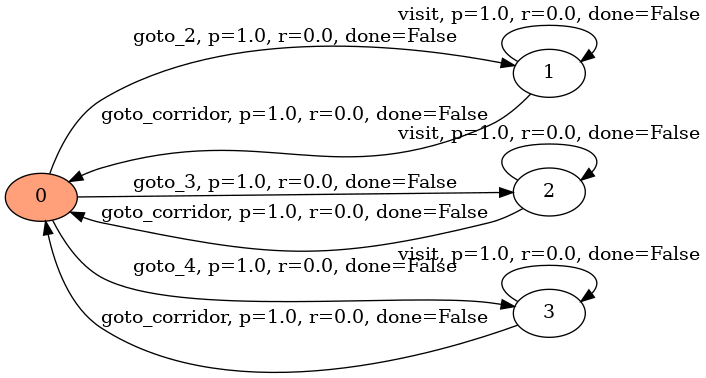

In [3]:
%matplotlib inline

import random
from io import BytesIO

import PIL
import gym
from IPython.core.display import display
from IPython.display import Image

from multinav.algorithms.value_iteration import value_iteration
from multinav.envs.abstract_sapientino import AbstractSapientino
from multinav.helpers.gym import Transitions, Transition

def display_img_array(ima):
    im = PIL.Image.fromarray(ima)
    bio = BytesIO()
    im.save(bio, format='png')
    display(Image(bio.getvalue(), format='png'))

def print_env(env: gym.Env):
    display_img_array(env.render(mode='rgb_array'))

env = AbstractSapientino(3, failure_probability=0.0)
env.reset()
print_env(env)

Do a rollout of a random policy:

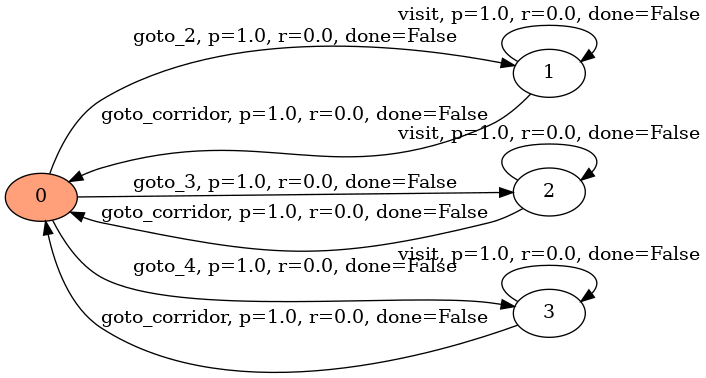

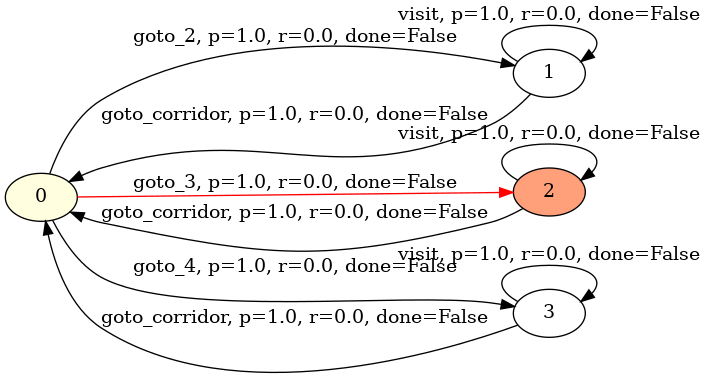

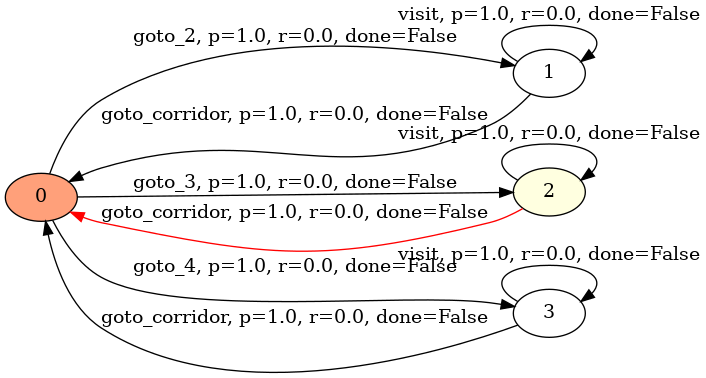

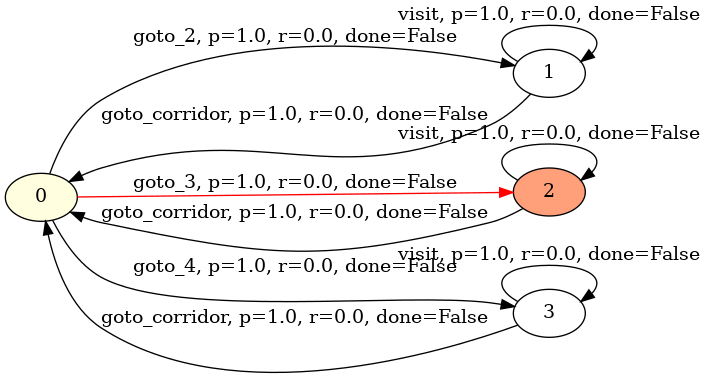

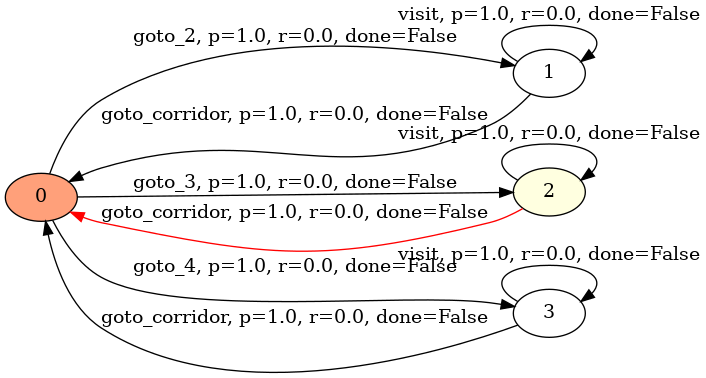

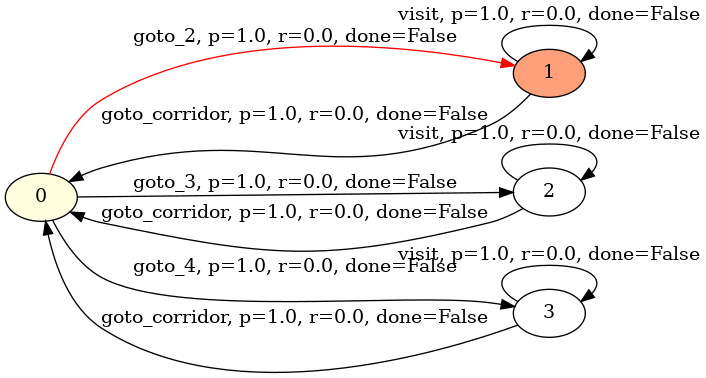

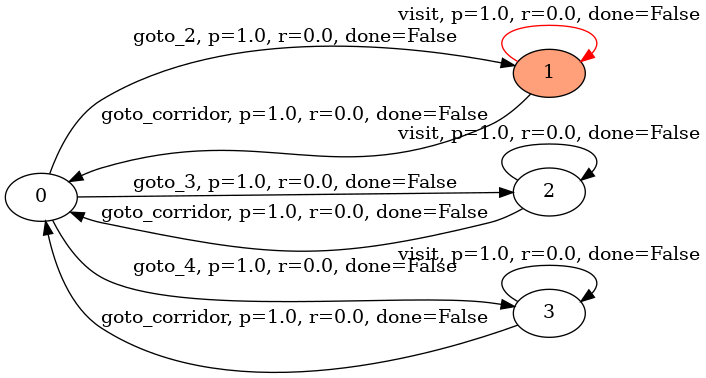

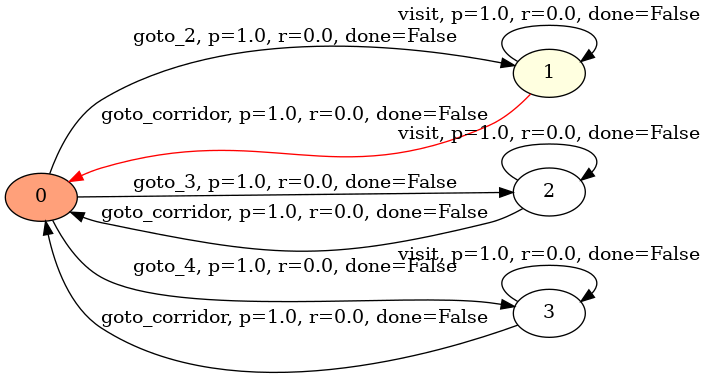

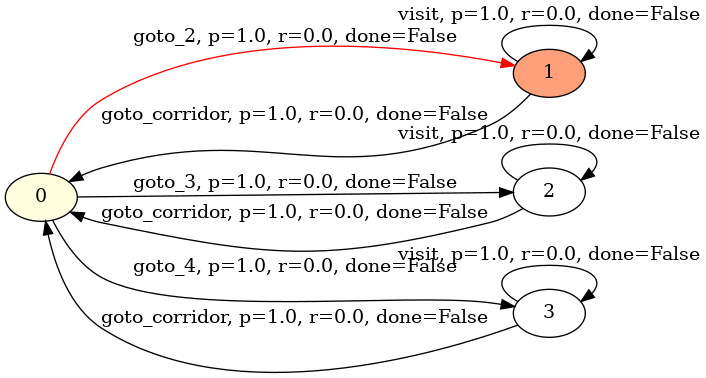

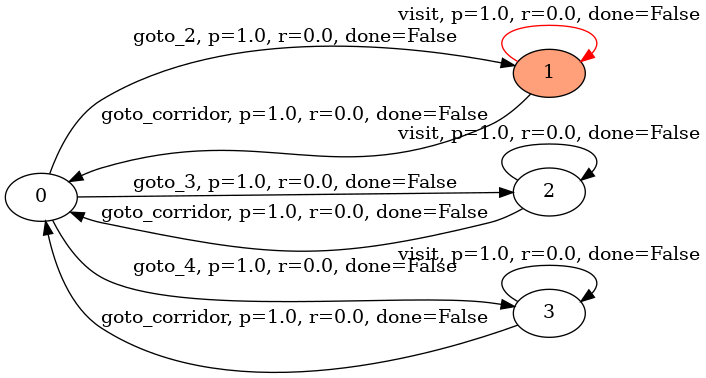

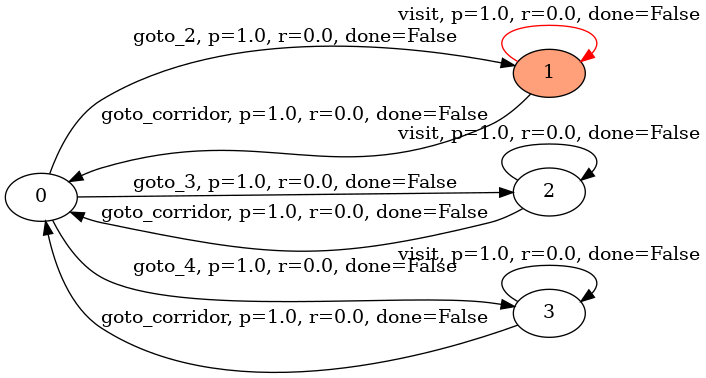

In [2]:
state = env.reset()
print_env(env)
for _ in range(10):
    action = random.choice(list(env.available_actions(state)))
    state, reward, done, info = env.step(action)
    print_env(env)

Let's add a reward if color 3 is visited.

In [5]:
class _reward_wrapper(AbstractSapientino):
    """Add reward when visiting the last color."""

    def _make_transitions(self) -> Transitions:
        result = super()._make_transitions()
        target_color = self.nb_colors - 1
        target_action = self.visit_color

        state = self.state_from_color(target_color)
        transition = result[state][target_action][0]
        new_transition = list(transition)
        new_transition[2] = 1.0
        new_transition_tuple: Transition = tuple(new_transition)  # type: ignore
        result[state][target_action] = [new_transition_tuple]

        return result

env = _reward_wrapper(3, failure_probability=0.0)
v = value_iteration(env, discount=0.9, max_iterations=200)
print(f"Learned value function: {v}")

Learned value function: [8.99991665 8.09992498 8.09992498 9.99991665]
